<a href="https://colab.research.google.com/github/SushantVij/NLP-CV-IOT-UCS657-/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Occupancy_Estimation.csv to Occupancy_Estimation.csv


In [ ]:
dataset = pd.read_csv('Occupancy_Estimation.csv')
dataset.head()

###Pre-Processing of Dataset

In [ ]:
dataset.shape

In [ ]:
dataset.isnull().sum()

In [6]:
dataset = dataset.drop(['Date','Time'],axis=1)

In [ ]:
sns.countplot(x = 'Room_Occupancy_Count', data=dataset)

In [8]:
X = dataset.iloc[:,0:-1]
y = dataset['Room_Occupancy_Count']

In [ ]:
ss = StandardScaler()
ss.fit_transform(X)

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [10]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [11]:
samples

[(      S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  \
  8983    25.25    25.31    24.94    25.44         0         0         0   
  1142    25.69    25.75    25.38    25.94         0         0         0   
  3680    26.25    26.19    26.00    26.38       114        19       180   
  9889    25.06    25.06    24.56    25.25         0         0         1   
  8334    25.94    26.19    25.88    25.94       146       231       170   
  ...       ...      ...      ...      ...       ...       ...       ...   
  9225    25.19    25.25    24.75    25.38         0         0         0   
  4859    25.19    25.19    24.63    25.56         0         0         0   
  3264    25.88    26.81    25.50    26.25       120        26        48   
  9845    25.06    25.06    24.56    25.19         0         0         0   
  2732    25.19    25.13    24.81    25.69        12        14        58   
  
        S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  \
  8

### Creation of a Fitness Function

In [12]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [15]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [16]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.95 Best Kernel =  linear Best Nu =  0.49 Best Epsilon =  8.02
Best Accuracy =  0.87 Best Kernel =  poly Best Nu =  4.39 Best Epsilon =  0.06
Best Accuracy =  0.89 Best Kernel =  rbf Best Nu =  7.86 Best Epsilon =  5.27
Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  1.88 Best Epsilon =  5.92
Best Accuracy =  0.95 Best Kernel =  linear Best Nu =  8.37 Best Epsilon =  6.61
Best Accuracy =  0.96 Best Kernel =  rbf Best Nu =  5.05 Best Epsilon =  0.38
Best Accuracy =  0.86 Best Kernel =  rbf Best Nu =  5.19 Best Epsilon =  2.48
Best Accuracy =  0.92 Best Kernel =  rbf Best Nu =  9.68 Best Epsilon =  1.02
Best Accuracy =  0.91 Best Kernel =  linear Best Nu =  1.6 Best Epsilon =  4.93
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  5.89 Best Epsilon =  6.8


###Creation of a Result Table

In [17]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.95,linear,0.49,8.02
1,2,0.87,poly,4.39,0.06
2,3,0.89,rbf,7.86,5.27
3,4,0.93,poly,1.88,5.92
4,5,0.95,linear,8.37,6.61
5,6,0.96,rbf,5.05,0.38
6,7,0.86,rbf,5.19,2.48
7,8,0.92,rbf,9.68,1.02
8,9,0.91,linear,1.60,4.93
9,10,0.92,poly,5.89,6.80


### Plotting of the Convergence Graph/Linear Curve

In [18]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [21]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 50), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [22]:
train_sizes

array([  63,  192,  321,  450,  579,  708,  837,  966, 1095, 1224, 1353,
       1481, 1610, 1739, 1868, 1997, 2126, 2255, 2384, 2513, 2642, 2771,
       2900, 3029, 3157, 3286, 3415, 3544, 3673, 3802, 3931, 4060, 4189,
       4318, 4447, 4576, 4705, 4833, 4962, 5091, 5220, 5349, 5478, 5607,
       5736, 5865, 5994, 6123, 6252, 6381])

In [23]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

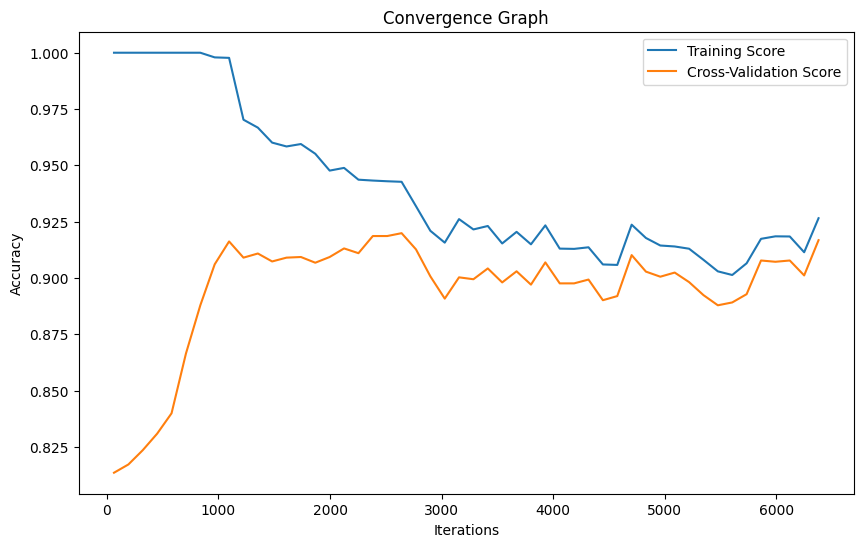

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()

In [26]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# Define the different sample sizes to use
samples = [(X_train[:500], X_test[:500], y_train[:500], y_test[:500]),
           (X_train[:1000], X_test[:1000], y_train[:1000], y_test[:1000]),
           (X_train[:2000], X_test[:2000], y_train[:2000], y_test[:2000]),
           (X_train[:5000], X_test[:5000], y_train[:5000], y_test[:5000]),
           (X_train, X_test, y_train, y_test)]

In [28]:
# Define the SVM kernel types to use
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [29]:
# Create an empty DataFrame to store the results
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])


In [30]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon


In [ ]:



# Create an empty DataFrame to store the results
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

# Define the fitness function
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

# Fit the SVM model 20 times
for i in range(20):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  svm = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  accuracy = round(accuracy_score(y_pred, y_test), 2)
  print('Accuracy for iteration', i+1, '=', accuracy)
